# Načítanie dát

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [21]:
user = pd.read_csv("dataset_iau/user.csv", sep='\t')
session = pd.read_csv("dataset_iau/session.csv", sep='\t')
product = pd.read_csv("dataset_iau/product.csv", sep='\t')

In [3]:
product.head()

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila


In [4]:
user.head()

,residence,sex,username,user_id,address,birthdate,race,job,name,current_location,mail
0,NaN,F,vigorellimatilda,295,"Borgo Gelsomina, 3 Piano 9\n12013, Chiusa Di P...",1917-03-25,NaN,NaN,Gemma Baracca,NaN,cesarecagnotto@tim.it
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,matsumotoasuka,298,三重県西東京市上広谷3丁目27番1号,NaN,NaN,演歌歌手,近藤 翼,"(Decimal('44.4329015'), Decimal('-94.188145'))",nakajimaatsushi@yahoo.com
2,"68187 Matthews Turnpike Suite 738\nWhitebury, ...",F,debra19,591,"63067 Jeffrey Village\nEast Jeffrey, TX 08868",1985-05-21,white,Tourism officer,Belinda Harvey,"(Decimal('17.674891'), Decimal('43.063751'))",kevindeleon@yahoo.com
3,"Canale Majorana, 522\n98168, Villaggio Annunzi...",NaN,udineseimelda,2538,NaN,2012-01-02,asian,NaN,Sig.ra Susanna Roero,"(Decimal('-65.4578585'), Decimal('-162.734373'))",federicacaccioppoli@tele2.it
4,NaN,NaN,debra72,590,USCGC Kim\nFPO AA 25581,NaN,white,NaN,Deborah Larson,"(Decimal('-67.907028'), Decimal('-104.061594'))",stevendavis@yahoo.com


In [5]:
session.head()

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937


# Analyza struktur dat

Pracujeme s datasetom 70. Obsahuje 3 súbory: product.csv, session.csv, user.csv (csv - comma-separated values).

### Product.csv

Súbor priraďuje produkty k obchodom, v ktorých ich predávajú a uvádza polohy týchto obchodov. Má 613 KB a obsahuje 4 stĺpce.

In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14958 entries, 0 to 14957
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_ean  14958 non-null  int64 
 1   code         14941 non-null  object
 2   store_name   14958 non-null  object
 3   location     14958 non-null  object
dtypes: int64(1), object(3)
memory usage: 467.6+ KB


### User.csv

Súbor uvádza detaily o pozorovaných používateľoch, ako napríklad ich trvalé bydlisko, pohlavie, dátum narodenia, zamestnanie. Má 446 KB a obsahuje 11 stĺpcov.esto)

In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   sex               1271 non-null   object
 2   username          2542 non-null   object
 3   user_id           2542 non-null   int64 
 4   address           2161 non-null   object
 5   birthdate         1398 non-null   object
 6   race              763 non-null    object
 7   job               1017 non-null   object
 8   name              2542 non-null   object
 9   current_location  2415 non-null   object
 10  mail              2542 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.6+ KB


### Session.csv

Súbor obsahuje detaily o jednotlivých sedeniach používateľov. Uvádza rôzne detaily, najmä informáciu, či sa sedenie skončilo nákupom produktu (ack), identifikátor používateľa, ktorý sedenie absolvoval (user_id) a identifikátor produktu (product_ean), o ktorý sa jednalo. Okrem toho opisuje napríklad aj dĺžku sedenia, veľkosť obrazovky zariadenia alebo rýchlosť pohybu myši používateľa. Má 2.26 MB a obsahuje 25 stĺpcov.

In [8]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   screen_width                    11089 non-null  object 
 7   pct_click                       11078 non-null  float64
 8   browser_name                    11089 non-null  object 
 9   pct_mouse_move                  11078 non-null  float64
 10  pct_click_product_info          11078 non-null  float64
 11  pct_scroll_move_duration        11078 non-null  float64
 12  pct_scrandom                    

# IDENTIFING PROBLEMS IN DATA (WITH PARTIAL SOLUTION)

## FIRST SEEN:

***In the provided date consisting of three datasets, we can find problems of the following types:***

   **USER**
    
   1. From the output of the first rows of the **user table**, we can see that some rows are written in **hieroglyphs**. (we have 2 options for dealing with this problem: either write a function that can translate from hieroglyphs to Latin symbols, or if their number is NOT significant - **delete it**, if significant - one of the **options for dealing with NaN**)
        
        
   2. **Unstructured data** in some fields, such as address or residence. In some of them there are postal codes, in random places. (Are these indexes necessary at all? How will they affect data analysis? I think that it will be possible to write an additional function that will **correct the unstructuredness**, **remove additional characters**, such as, for example: numbers, tabs, newline characters. Perhaps the address can be simplified to the simplier form (cities).) I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
   
   
    
   3. In the field **job** using the unique method, you can see that the job attributes **is too long** what is unnecessary for analysis. I think that it will be possible **to write a function** that standardizes all works **to a more readable form**.
    
    
   4. In the **current_location** field, you can see a type of data that is not convenient for analysis **(Decimal('44.4329015'), Decimal('-94.188145'))**. I think that this problem needs a more difficult solution, so we will solve it in the **second phase of the project**.
    
    
   5. etc.
    
   **PRODUCT**
   
   1. The **location** field can be divided into a more convenient view, that is, **into 2 columns, country and city**.
    
   2. etc.
    
   **SESSION**
   
   1. In the dataset MAYBE there are a lot of **unnecessary fields** that will not be triggered in the analysis, that do not represent analytical value. For example, what exhibits can we make from information about the user's extension? (Let's just remove some, in our opinion, redundant information from the dataset)
    
   2. etc.
   
   **ETC.**
   
       Almost all datasets have outliers + duplicates + missing data. We will deal with this situationally in most cases. In particular, we will delete only rows with a too large percentage of missing data, because these rows do not represent analytical value for us.
       
   **ADDITIONAL NOTES**
   
        The goal is also to output one continuous dataset by connecting fields (product_ean, user_id). This will provide us with a faster and, accordingly, more practical access to data. Except for some exceptional cases where we will probably need to use split datasets.

## USER CORRECTING

### USEFULLNESS OF FIELDS

- Fields **race, username and mail** are **NOT analyticly valuable**. So that we can delete them.

- **residence vs. address vs. current_location**?? Do we need all of them??

     

- We can check exactly which **coordinates** are presented in the field of **current_location**, accordingly in some variants we will get values that refer us to the middle of the ocean, which leads us to the **conclusion about the randomness** of some data. Accordingly, it is not yet known how exactly we should use this attribute.

  **Example:** 
  
           (Decimal('-67.907028'), Decimal('-104.061594')) - 67°54'25.3"S 104°03'41.7"W (Pacific Ocean)
  
           (Decimal('-85.641904'), Decimal('-53.404531')) - 85°38'30.9"S 53°24'16.3"W (Antarctic Ice shield)
           
           (Decimal('85.034897'), Decimal('164.620498')) - 85°02'05.6"N 164°37'13.8"E (Arctic Ocean)

- Can use name for **predicting sex** (using it as ack)?? For example, if we shall get **from name** last char, and it appears to be 'a', and if sex="NaN", then we change it to F. (just theory)


In [5]:
user = user.drop(columns=['race', 'username', 'mail', 'name', 'job'], axis=1)
user

,residence,sex,user_id,address,birthdate,current_location
0,NaN,F,295,"Borgo Gelsomina, 3 Piano 9\r\n12013, Chiusa Di...",1917-03-25,NaN
1,山口県立川市北上野40丁目24番4号 上野公園コーポ077,M,298,三重県西東京市上広谷3丁目27番1号,NaN,"(Decimal('44.4329015'), Decimal('-94.188145'))"
2,68187 Matthews Turnpike Suite 738\r\nWhitebury...,F,591,"63067 Jeffrey Village\r\nEast Jeffrey, TX 08868",1985-05-21,"(Decimal('17.674891'), Decimal('43.063751'))"
3,"Canale Majorana, 522\r\n98168, Villaggio Annun...",NaN,2538,NaN,2012-01-02,"(Decimal('-65.4578585'), Decimal('-162.734373'))"
4,NaN,NaN,590,USCGC Kim\r\nFPO AA 25581,NaN,"(Decimal('-67.907028'), Decimal('-104.061594'))"
...,...,...,...,...,...,...
2537,NaN,M,2423,Dobrošovská 506\r\n487 16 Vysoké nad Jizerou,NaN,"(Decimal('6.326596'), Decimal('50.261770'))"
2538,NaN,F,1783,Bachmanngasse 96\r\n15562 Pasewalk,NaN,"(Decimal('-20.2418925'), Decimal('-42.286118'))"
2539,"Canale Maria, 73\r\n20080, Bubbiano (MI)",F,2024,"Canale Lorenzo, 4\r\n21030, Cugliate (VA)",NaN,"(Decimal('-85.641904'), Decimal('-53.404531'))"
2540,NaN,M,936,"Chácara João Lucas Rezende, 76\r\nVila Da Paz\...",1954-07-03,"(Decimal('-51.687864'), Decimal('135.289800'))"


### NAN PROBLEMS

In [ ]:
nan_user_counts = user.isna().sum()
nan_user_counts

***With the help of the | user.dropna(thresh=6) | command, we can delete all rows that have more than 2 ON values. This will quickly search for lines that are not needed for research.***

In [ ]:
#user = user.dropna(thresh=6)

### OUTLAYER PROBLEMS

*Main outlayer problem in user dataset is **hieroglyphs' form of some attributes**. So that we can check its count form **.unique() method**. Let's write the method for **checking percentage** of hieroglyph symbols in each column.*

In [ ]:
import re

def get_percent_of_hieroglyphs(col):
    uniq = user[col].unique()
    not_hieroh = []
    pattern = r"^[a-zA-Z0-9]+"
    for text in uniq:
        if isinstance(text, str) and re.match(pattern, text):
            not_hieroh.append(text)
    print(f"Count of NOT hieroglyph: {len(not_hieroh)}")
    print(f"Count of all unique: {len(uniq)}")
    print(f"Percent of hieroglyphs in {col}: {100 - (len(not_hieroh)/len(uniq) * 100)}%")

get_percent_of_hieroglyphs("residence")
get_percent_of_hieroglyphs("address")

*We have too much words in job attributes, that's why we should **simplifize some of jobs to one word**, if we could, for this we will write a **method:***

### DUPLICATES PROBLEMS

In [45]:
duplicates_count = user.apply(lambda x: x.duplicated().sum())
duplicates_count

residence           1651
sex                 2539
username              34
user_id              936
address              380
birthdate           1157
race                2536
job                 1959
name                  53
current_location     126
mail                  11
dtype: int64

In [7]:
user = user.drop_duplicates(keep='first')
#user

In [8]:
#user.info()

## SESSION ANALYZING

In [9]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,1920,5.59338,firefox,9.67918,...,47.14750,NaN,463,lower,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,1280,5.16977,mobile,8.28987,...,39.86244,5.79656,445,768,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


### USEFULLNESS OF FIELDS

**ALL OF THEM CAN BE USED IN PERSPECTIVES OF ANALYSIS**


**Interaction during the session:**

***page_activity_duration = duration of user activity on the page***

wild_mouse_duration = duration of rapid mouse movement

***mouse_move_total_rel_distance = normalized to screen height and width***

***scroll_move_total_rel_distance = normalized to screen height and width***
     
**(pct_) ratio of the number of interactions of a given type to the total number multiplied by the base value:**

pct_scroll_move_duration = normonovaná value for the total time of scrolling

pct_mouse_move = mouse movement records

pct_scroll_move = roll records

pct_wild_mouse = records of rapid mouse movement

***pct_click = records of user clicks***

***pct_double_click = records of a user's double click***

pct_rage_click = records of violent clicks on the page

pct_input = records of user input

pct_scrandom = records of fast pressing on the page

pct_click_product_info = product information click records

In [48]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11089 entries, 0 to 11088
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_mouse_click                 11078 non-null  float64
 1   total_load_time                 11089 non-null  float64
 2   mouse_move_total_rel_distance   11078 non-null  float64
 3   session_start                   11089 non-null  object 
 4   session_id                      11089 non-null  int64  
 5   ack                             11089 non-null  float64
 6   pct_click                       11078 non-null  float64
 7   browser_name                    11089 non-null  object 
 8   pct_mouse_move                  11078 non-null  float64
 9   pct_click_product_info          11078 non-null  float64
 10  pct_scroll_move_duration        11078 non-null  float64
 11  pct_scrandom                    11078 non-null  float64
 12  session_duration                

In [47]:
session['screen_resolution'] = session['screen_width'].astype(str) + ' x ' + session['screen_height'].astype(str)
session = session.drop(columns=['screen_width', 'screen_height'], axis=1)
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,pct_click,browser_name,pct_mouse_move,pct_click_product_info,...,pct_rage_click,scroll_move_total_rel_distance,user_id,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration,screen_resolution
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,6.95057,opera,6.03169,50.59959,...,27.21166,6.09851,868,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376,lower x 1080
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,NaN,edge,6.70707,44.00683,...,57.45350,9.70491,748,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609,800 x 1080
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,7.19415,edge,5.84443,49.93366,...,47.46144,5.79315,1959,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608,lower x 768
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,9.56752,chrome,8.75647,32.96224,...,45.16742,9.26782,1587,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936,1280 x 1080
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,7.21841,mobile,5.68521,56.01077,...,51.15321,12.26355,2476,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937,1366 x 1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,5.59338,firefox,9.67918,50.05049,...,47.14750,NaN,463,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640,1920 x lower
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,5.16977,mobile,8.28987,76.86145,...,39.86244,5.79656,445,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923,1280 x 768
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,11.54376,mobile,11.46814,44.09592,...,35.09946,7.35456,1688,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022,1024 x 768
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,4.38175,chrome,9.94778,60.98057,...,57.69495,8.65941,755,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471,1920 x 800


### NAN PROBLEMS

In [ ]:
nan_session_counts = session.isna().sum()
nan_session_counts

### OUTLAYER PROBLEMS

*Let's try to analyze the attributes that are important to us. By drawing graphs and gradually identifying either anomalies or outliers, we will clean up our datasets.*

<Axes: xlabel='session_duration', ylabel='Count'>

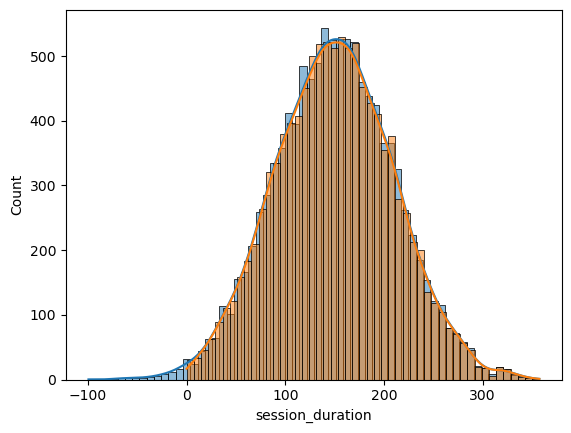

In [12]:
sns.histplot(session['session_duration'], kde=True)
session.loc[session['session_duration'] < 0, 'session_duration'] = np.nan
sns.histplot(session['session_duration'], kde=True)

<Axes: xlabel='pct_doubleclick', ylabel='Count'>

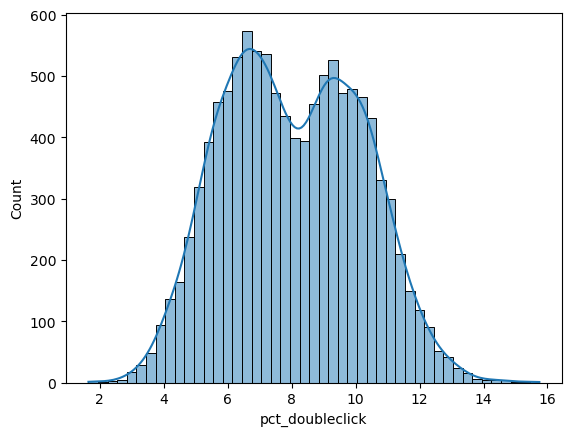

In [13]:
sns.histplot(session['pct_doubleclick'], kde=True)

<Axes: xlabel='scroll_move_total_rel_distance', ylabel='Count'>

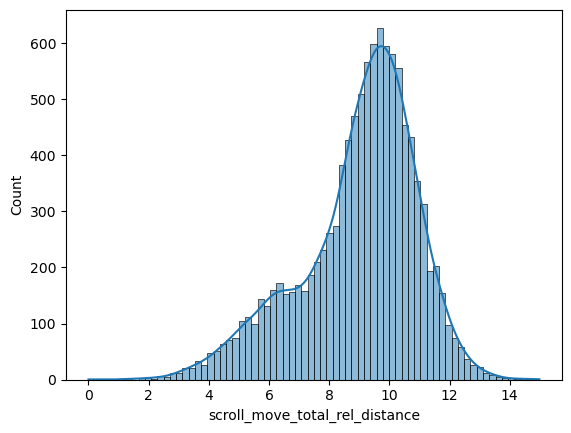

In [14]:
sns.histplot(session['scroll_move_total_rel_distance'], kde=True)

### DUPLICATES PROBLEMS

In [10]:
duplicates_session_count = session.apply(lambda x: x.duplicated().sum())
#duplicates_session_count

In [11]:
session = session.drop_duplicates(keep='first')
#session

### RESULT :

In [44]:
session

,pct_mouse_click,total_load_time,mouse_move_total_rel_distance,session_start,session_id,ack,screen_width,pct_click,browser_name,pct_mouse_move,...,pct_rage_click,scroll_move_total_rel_distance,user_id,screen_height,pct_input,pct_doubleclick,product_ean,pct_scroll_move,pct_wild_mouse,wild_mouse_duration
0,6.76035,15.00632,7.91611,2023-07-06 00:59:11,719775,0.0,lower,6.95057,opera,6.03169,...,27.21166,6.09851,868,1080,1.95647,6.97834,248099568029,44.03202,46.68163,10.74376
1,5.46624,1.04290,8.84385,2021-01-17 05:46:46,92085,0.0,800,NaN,edge,6.70707,...,57.45350,9.70491,748,1080,2.29294,9.61049,6638480475311,29.28054,65.50466,10.91609
2,6.75326,5.53722,8.14337,2019-02-13 15:46:33,1194424,0.0,lower,7.19415,edge,5.84443,...,47.46144,5.79315,1959,768,0.36497,5.14403,7111799508394,41.13195,66.42266,8.70608
3,9.09710,6.81720,6.52434,2019-06-15 19:33:59,335521,1.0,1280,9.56752,chrome,8.75647,...,45.16742,9.26782,1587,1080,0.15159,10.58422,2755517198198,53.76225,49.90523,7.34936
4,4.85419,3.92631,7.87990,2022-09-22 07:44:05,1144426,1.0,1366,7.21841,mobile,5.68521,...,51.15321,12.26355,2476,1024,0.10660,9.54298,4511971237235,56.00922,41.36312,6.19937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,9.85009,2.90130,5.35139,2022-05-28 00:56:48,1424279,0.0,1920,5.59338,firefox,9.67918,...,47.14750,NaN,463,lower,1.62560,5.15106,5854850554306,60.29421,50.56457,10.57640
11085,8.06033,8.88865,7.53117,2022-04-08 01:42:18,263847,0.0,1280,5.16977,mobile,8.28987,...,39.86244,5.79656,445,768,1.04892,7.14042,2516168790601,56.63606,49.23994,10.07923
11086,12.62420,6.86250,8.03572,2019-06-18 14:13:21,644898,1.0,1024,11.54376,mobile,11.46814,...,35.09946,7.35456,1688,768,0.10712,9.25177,144629156509,55.18118,63.97125,3.45022
11087,6.78625,3.70992,8.78765,2020-03-23 08:11:59,720161,1.0,1920,4.38175,chrome,9.94778,...,57.69495,8.65941,755,800,0.29624,4.01411,344747904604,49.92276,60.56904,8.45471


## PRODUCT ALALYSING

In [22]:
product

,product_ean,code,store_name,location
0,4309748882180,US,Tyler,America/Chicago
1,5851941655164,PK,Alipur,Asia/Karachi
2,5289124458231,MY,Kampung Ayer Molek,Asia/Kuala_Lumpur
3,6565130443652,US,Glendale,America/Los_Angeles
4,8081875346334,PH,Naga,Asia/Manila
...,...,...,...,...
14953,6077115675137,US,Fairview Heights,America/Chicago
14954,8549791867352,DE,Ehingen,Europe/Berlin
14955,8931618033734,RU,Tyoply Stan,Europe/Moscow
14956,3259372694448,RU,Mikhaylovka,Europe/Volgograd


In [25]:
product[['region', 'city']] = product['location'].str.split('/', n=1, expand=True)
product = product.drop(['store_name', 'location'], axis=1)
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### NAN PROBLEMS

In [26]:
product.isna().sum()

product_ean     0
code           17
region          0
city            0
dtype: int64

In [27]:
product = product.dropna()
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


### OUTLAYER PROBLEMS

### DUPLICATES PROBLEMS

In [ ]:
product = product.drop_duplicates(keep='first')

In [ ]:
product['product_ean'].duplicated().sum()

In [37]:
product['region'].duplicated().sum()
uniq_reg = product['region'].unique()
uniq_reg

array(['America', 'Asia', 'Europe', 'Africa', 'Australia', 'Pacific',
       'Atlantic', 'Indian'], dtype=object)

In [38]:
matching_rows = product[product['region'] == 'Pacific']
matching_rows

,product_ean,code,region,city
35,1920866758589,NZ,Pacific,Auckland
155,6059445329478,US,Pacific,Honolulu
233,3614297309547,PG,Pacific,Port_Moresby
326,7737036803567,PG,Pacific,Port_Moresby
472,4172859785264,NZ,Pacific,Auckland
...,...,...,...,...
14289,8301916139047,NZ,Pacific,Auckland
14404,6407588828219,PG,Pacific,Port_Moresby
14427,4981889226957,PG,Pacific,Port_Moresby
14512,4617494512528,US,Pacific,Honolulu


<Axes: xlabel='region', ylabel='Count'>

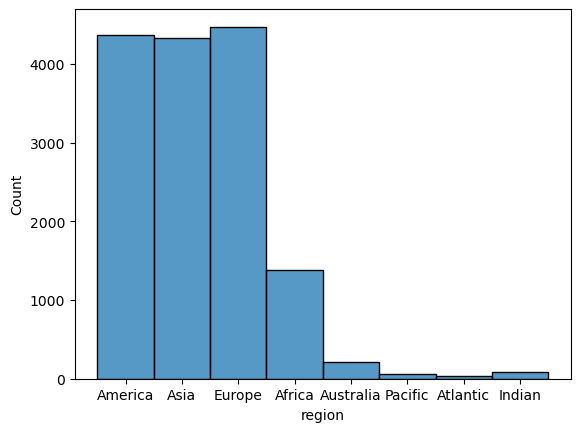

In [39]:
sns.histplot(product['region'])

In [42]:
def check_count_of_region_attr(region):
    attribute_counts = product['region'].value_counts()
    count_of_defined_attribute = attribute_counts.get(region, 0)
    return f"{region}: {count_of_defined_attribute} times."

for region in uniq_reg:
    print(check_count_of_region_attr(region))

America: 4373 times.
Asia: 4329 times.
Europe: 4474 times.
Africa: 1376 times.
Australia: 210 times.
Pacific: 61 times.
Atlantic: 38 times.
Indian: 80 times.


### RESULT :

In [43]:
product

,product_ean,code,region,city
0,4309748882180,US,America,Chicago
1,5851941655164,PK,Asia,Karachi
2,5289124458231,MY,Asia,Kuala_Lumpur
3,6565130443652,US,America,Los_Angeles
4,8081875346334,PH,Asia,Manila
...,...,...,...,...
14953,6077115675137,US,America,Chicago
14954,8549791867352,DE,Europe,Berlin
14955,8931618033734,RU,Europe,Moscow
14956,3259372694448,RU,Europe,Volgograd


## CONCLUSION. WHAT WAS CHANGED?